[*********************100%***********************]  1 of 1 completed


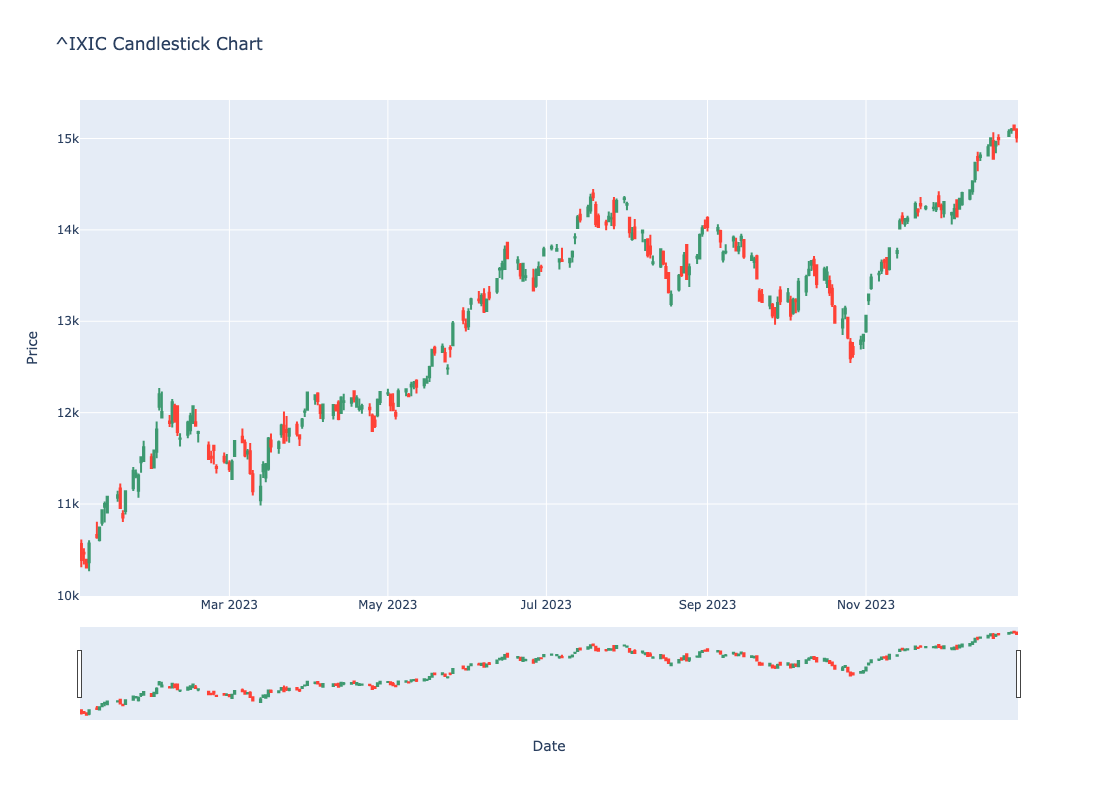

In [3]:
# Import required libraries
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

# Enable Plotly's offline mode for Jupyter Notebook
init_notebook_mode(connected=True)

# Define the stock symbol and time range
stock_symbol = "^IXIC"  # NASDAQ Composite
start_date = "2023-01-01"
end_date = "2023-12-31"

# Fetch the stock data
nasdaq_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Reset the index to make 'Date' a column
nasdaq_data.reset_index(inplace=True)

# Clean column names by renaming them
nasdaq_data.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Drop rows with NaN values (if any)
nasdaq_data = nasdaq_data.dropna()

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=nasdaq_data['Date'],  # X-axis: Dates
    open=nasdaq_data['Open'],  # Open prices
    high=nasdaq_data['High'],  # High prices
    low=nasdaq_data['Low'],  # Low prices
    close=nasdaq_data['Close']  # Close prices
)])

# Customize the chart layout
fig.update_layout(
    title=f'{stock_symbol} Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=True,  # Enable range slider
    height=800  # Set chart height
)

# Display the chart
iplot(fig)